In [83]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [84]:
#Readining our data using pandas
df = pd.read_csv('FuelConsumptionCo2.csv')
#Selecting feature and target 
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [29]:
#Splitting our data set into training set and testing set
split = np.random.rand(len(df)) < 0.8
train = cdf[split]
test = cdf[~split]

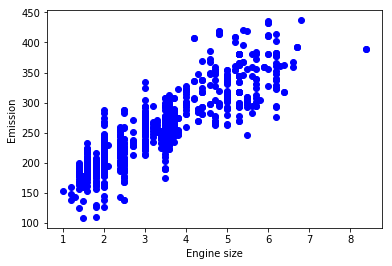

In [30]:
#Scattering our training data set
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

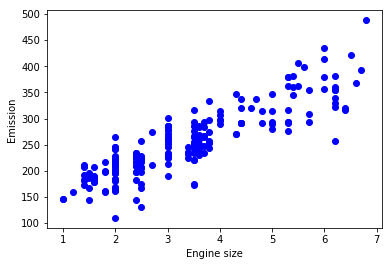

In [31]:
#scattering our testing set
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [72]:
#aconverting our training and testing set into numpy arrays
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

In [63]:
#Normalizing training and testing data
train_x = train_x/train_x.max()
train_y = train_y/train_y.max()
test_x = test_x/test_x.max()
test_y = test_y/test_y.max()

In [64]:
#Defining functions for line,Mean square error,derivative of slope and derivative of intercept
def line(m,x,c):
    return m * x + c

def error(m,x,c,y_a):
    return np.mean(((line(m,x,c) - y_a)**2))

def der_slope(m,x,c,y_a):
    return np.mean(2 * (line(m,x,c) - y_a) * x)
    
def der_int(m,x,c,y_a):
    return np.mean(2 * (line(m,x,c) - y_a))

def accuracy_pred(error,y):
    return 100 - (error/np.mean(y**2))*100


Initial Error:  69993.83802816902
Final Reduced Error:  950.298329439329
41.65494673661788 115.84379125069476


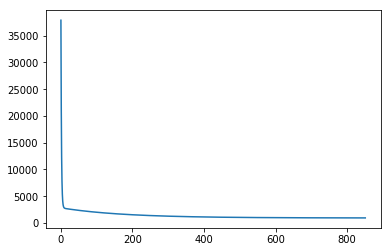

In [75]:
#Performing Gradient descent loop and error reducing plot
m = 0
c = 0
m_copy = m
c_copy = c

costs = []

lr = 0.01
for i in range(len(train_x)):
    m = m - lr * der_slope(m,train_x,c,train_y)
    c = c - lr * der_int(m,train_x,c,train_y)
    print(error(m,train_x,c,train_y))
    costs.append(error(m,train_x,c,train_y))
    clear_output(True)

print("Initial Error: ",error(m_copy,train_x,c_copy,train_y))
print("Final Reduced Error: ",error(m,train_x,c,train_y))
plt.plot(costs)
print(m,c)

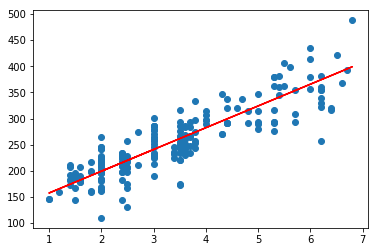

In [80]:
#Ploting our predicted line on test dataset
y_p = line(m,test_x,c)
plt.scatter(test_x,test_y)
plt.plot(test_x,y_p,'-r')

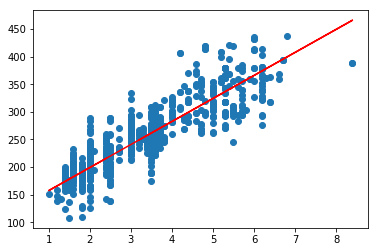

In [81]:
#Ploting our predicted line on training dataset
y_p = line(m,train_x,c)
plt.scatter(train_x,train_y)
plt.plot(train_x,y_p,'-r')

In [82]:
#prediction accuracy on training and testing dataset
print("our prediction accuracy on training data set is",accuracy_pred(error(m,train_x,c,train_y),train_y))
print("our prediction accuracy on testing data set is",accuracy_pred(error(m,test_x,c,test_y),test_y))


our prediction accuracy on training data set is 98.64231144310607
our prediction accuracy on testing data set is 98.53863069462578
